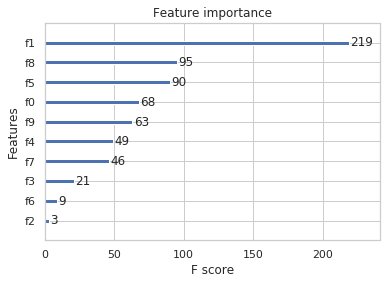

In [2]:
# XGBoost

# -*- coding: utf-8 -*-
"""
Created on Wed Aug 07 16:00:00 2019

@author: Geoffrey Duncan Opiyo
"""

# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import pandas as pd
import seaborn as sns
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import xgboost as xgb
from xgboost import plot_importance
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


# Importing the dataset
dataset_XGB = pd.read_csv('SAMPLE_machine_learning_data.csv')
X = dataset_XGB.iloc[:, 0:10].values
y = dataset_XGB.iloc[:, 10].values

#data_dmatrix = xgb.DMatrix(data=X,label=y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

# plot feature importance
plot_importance(classifier)
plt.show()


In [3]:
dataset_XGB.head(5)

,NS_count,creation_date,registrar_opt,last_updated,expiration_date,domain_age,TLDstatus,TLDstringct,DNstringct,DNstringft,domain_type
0,3,201611.1214,1,0.0,0.0,-201611.1214,1,3,15,3.0,1
1,2,201905.0610,1,0.0,0.0,-201905.0610,1,3,13,2.0,1
2,2,201602.2814,1,0.0,0.0,-201602.2814,1,3,15,2.0,1
3,2,201706.1519,1,0.0,0.0,-201706.1519,1,3,13,1.0,1
4,3,201611.1214,1,0.0,0.0,-201611.1214,1,3,15,3.0,1


In [20]:
accuracies

array([0.80727273, 0.81181818, 0.83090909, 0.81727273, 0.80363636,
       0.79909091, 0.79253867, 0.79526843, 0.81073703, 0.81346679])

In [4]:
#Calculating model accuracy
accuracies.mean()

0.808201091901729

In [5]:
#Calculating Variance in the model
accuracies.std()

0.01078169273409138

In [6]:
# XGBoost Model Evaluation metrics 

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

#Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('\n')
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))
print('\n')

Accuracy Score : 0.8163636363636364
Precision Score : 0.7897545357524013
Recall Score : 0.7061068702290076
F1 Score : 0.7455919395465995


Confusion Matrix : 
[[1505  197]
 [ 308  740]]




In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1702
           1       0.79      0.71      0.75      1048

   micro avg       0.82      0.82      0.82      2750
   macro avg       0.81      0.80      0.80      2750
weighted avg       0.81      0.82      0.81      2750



In [24]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
y_pred

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
# plot single tree

import os
plot_tree(classifier)
plt.show()

Confusion matrix, without normalization
[[1505  197]
 [ 308  740]]


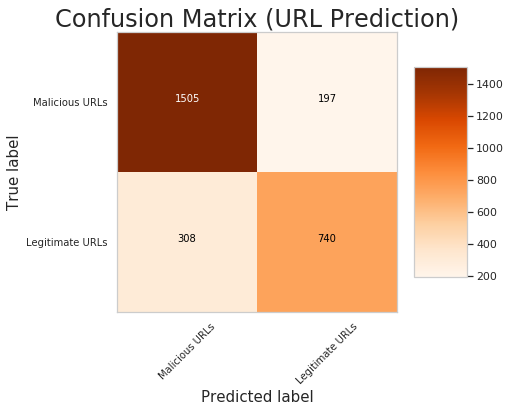

In [8]:
#Confusion Matrix


from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
   
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (7, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 10)
    plt.yticks(tick_marks, classes, size = 10)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 10,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 15)
    plt.xlabel('Predicted label', size = 15)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Malicious URLs', 'Legitimate URLs'],
                      title = 'Confusion Matrix (URL Prediction)')

plt.savefig('cm.png')


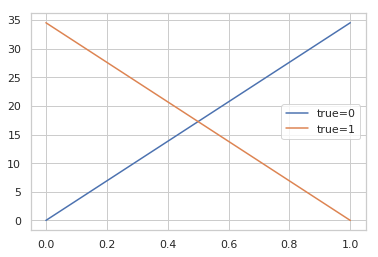

In [14]:
# plot impact of logloss for single forecasts

from sklearn.metrics import log_loss
from matplotlib import pyplot
from numpy import array
# predictions as 0 to 1 in 0.01 increments
y_pred = classifier.predict(X_test)
# evaluate predictions for a 0 true value
losses_0 = [log_loss([0], [x], labels=[0,1]) for x in y_pred]
# evaluate predictions for a 1 true value
losses_1 = [log_loss([1], [x], labels=[0,1]) for x in y_pred]
# plot input to loss
pyplot.plot(y_pred, losses_0, label='true=0')
pyplot.plot(y_pred, losses_1, label='true=1')
pyplot.legend()
pyplot.show()